In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
pg = sns.load_dataset('penguins')

In [13]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [14]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [18]:
pg['island'].head()

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

# Visualize the dataset

<Axes: xlabel='bill_length_mm', ylabel='species'>

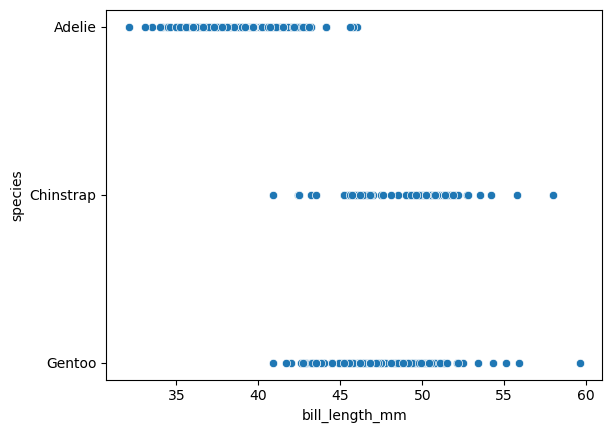

In [20]:
sns.scatterplot(x = pg['bill_length_mm'], y = pg['species'], data= pg)

<Axes: xlabel='island', ylabel='species'>

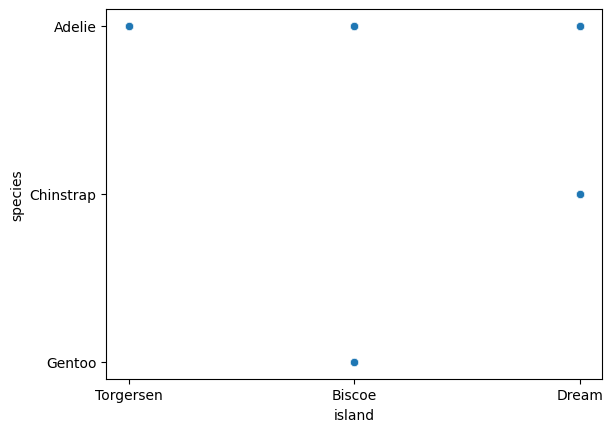

In [21]:
sns.scatterplot(x = pg['island'], y = pg['species'], data= pg)

<Axes: xlabel='bill_depth_mm', ylabel='species'>

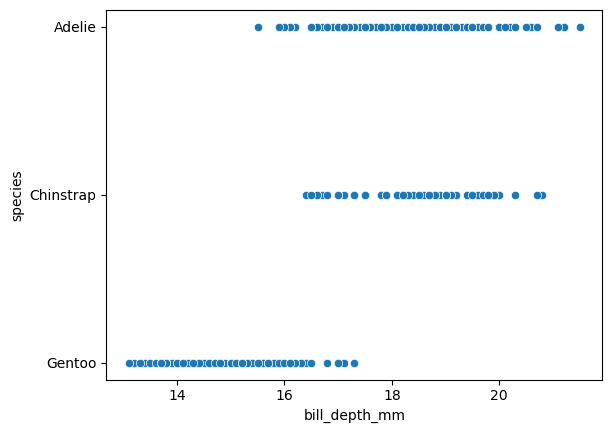

In [24]:
sns.scatterplot(x = pg['bill_depth_mm'], y = pg['species'], data = pg)

<Axes: xlabel='species', ylabel='count'>

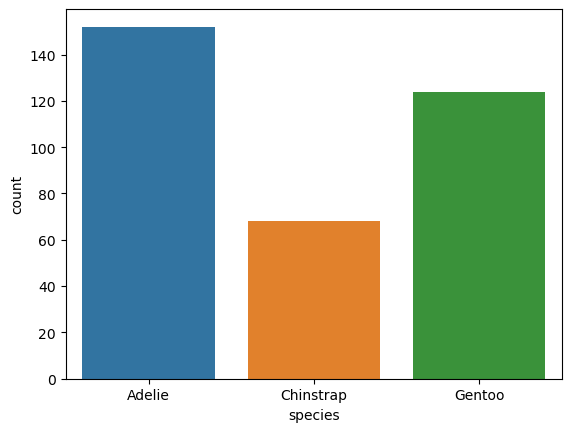

In [26]:
sns.countplot(x = pg['species'], data = pg)

<Axes: xlabel='sex', ylabel='count'>

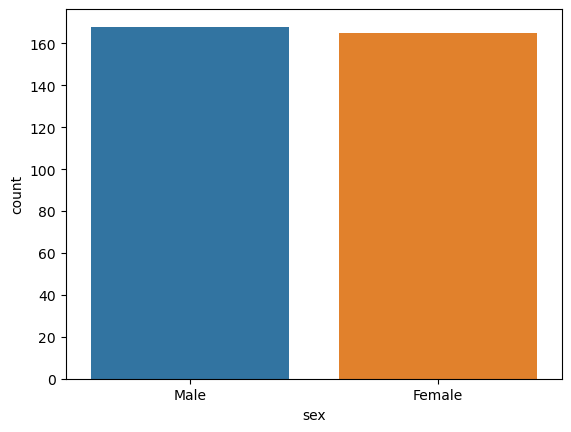

In [28]:
sns.countplot(x = pg['sex'], data = pg)

<Axes: xlabel='island', ylabel='count'>

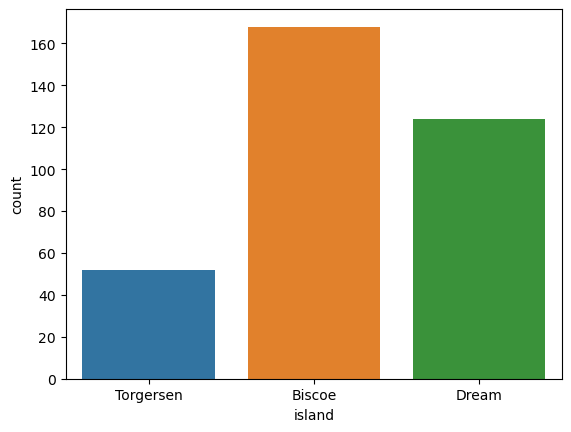

In [29]:
sns.countplot(x = pg['island'], data = pg)

<Axes: xlabel='flipper_length_mm', ylabel='species'>

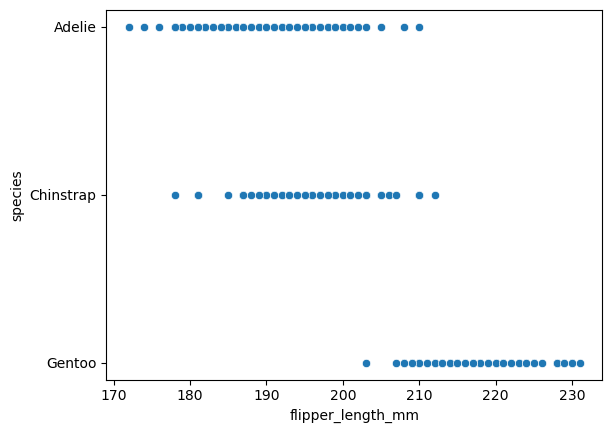

In [31]:
sns.scatterplot(x = pg['flipper_length_mm'], y = pg['species'], data = pg)

<Axes: xlabel='body_mass_g', ylabel='species'>

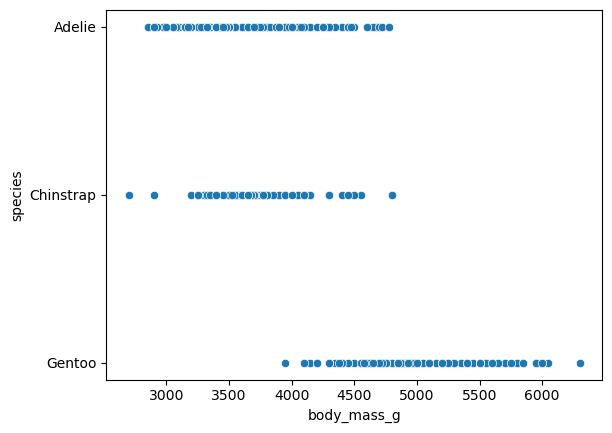

In [32]:
sns.scatterplot(x = pg['body_mass_g'], y = pg['species'], data = pg)

In [35]:
pg['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [37]:
pg['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

# Encoding the Object type features into Numeric type 

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [42]:
sex_encoder = LabelEncoder()
island_encoder = LabelEncoder()

In [56]:
X = pg[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
Y = pg['species']

In [57]:
sex_encoder.fit(pd.DataFrame(X['sex']))
X['sex'] = sex_encoder.transform(X['sex'])

island_encoder.fit(pd.DataFrame(X['island']))
X['island'] = island_encoder.transform(X['island'])

In [65]:
X.isnull().sum()

island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [67]:
X['bill_length_mm'].fillna(X['bill_length_mm'].mean(), inplace = True)
X['bill_depth_mm'].fillna(X['bill_depth_mm'].mean(), inplace = True)
X['flipper_length_mm'].fillna(X['flipper_length_mm'].mean(), inplace = True)
X['body_mass_g'].fillna(X['body_mass_g'].mean(), inplace = True)

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    int32  
 1   bill_length_mm     344 non-null    float64
 2   bill_depth_mm      344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   sex                344 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 13.6 KB


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [71]:
model_log_reg = LogisticRegression()

In [72]:
model_log_reg.fit(X_train, Y_train)

LogisticRegression()

In [73]:
y_pred = model_log_reg.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [76]:
score = accuracy_score(Y_test, y_pred)

In [77]:
score

0.9855072463768116

In [78]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        32
   Chinstrap       1.00      0.94      0.97        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



In [81]:
X.iloc[50]

island                  0.0
bill_length_mm         39.6
bill_depth_mm          17.7
flipper_length_mm     186.0
body_mass_g          3500.0
sex                     0.0
Name: 50, dtype: float64

In [82]:
model_log_reg.predict([[0.0,	39.6,	17.7,	186.0,	3500.0,	0.0]])

array(['Adelie'], dtype=object)

In [83]:
Y.iloc[50]

'Adelie'